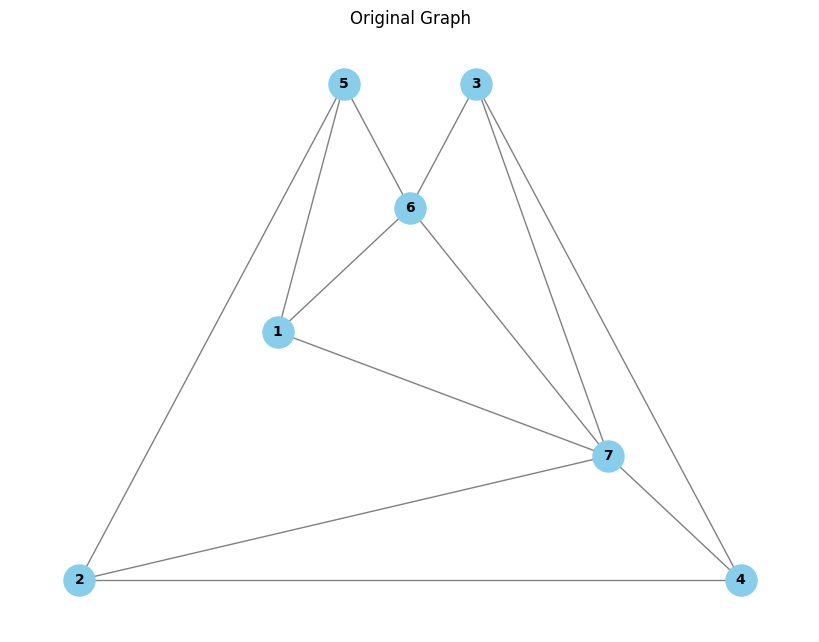

First detected face (vertices): [1, 7, 2, 5]
Added new vertex: 8
Edges added: [(8, 1), (8, 7), (8, 2), (8, 5)]
Updated adjacency matrix:
[[0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 0. 1. 0. 1.]
 [1. 1. 0. 0. 1. 0. 1. 0.]]


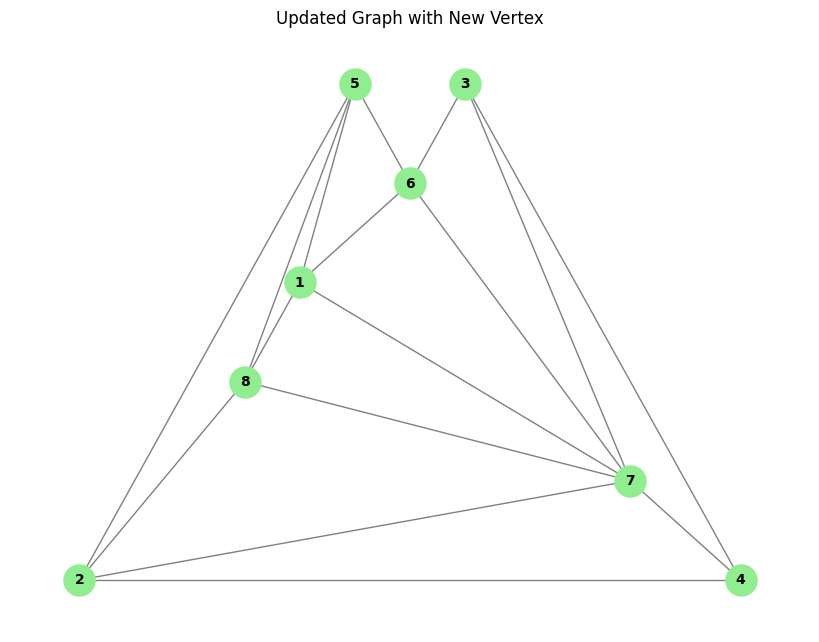

In [22]:
# MAIN CODE

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def process_graph_with_new_vertex(adj_matrix):

    # Create the graph from the adjacency matrix
    G = nx.Graph(adj_matrix)

    # Check if the graph is planar
    is_planar, embedding = nx.check_planarity(G)
    if not is_planar:
        print("The graph is not planar.")
        return adj_matrix

    # Plot the original graph

    plot_graph(G, title="Original Graph", node_color="skyblue")

    # Find the faces in the planar embedding
    faces = []
    for edge in embedding.edges:
        face = list(embedding.traverse_face(*edge))
        faces.append(face)

    # Choose the first face that forms a valid cycle (triangle, square, or pentagon)
    face = None
    for f in faces:
        if len(f) in [3, 4, 5]:  # Only consider cycles of length 3, 4, or 5
            face = f
            break

    if not face:
        print("No triangle, square, or pentagon face detected. No changes made to the graph.")
        return adj_matrix

    # Add a new vertex and connect it to all vertices of the detected face
    new_vertex = max(G.nodes()) + 1  # Assign a new vertex ID
    for vertex in face:
        G.add_edge(new_vertex, vertex)

    # Check if the new graph is planar
    is_planar_new, _ = nx.check_planarity(G)
    if not is_planar_new:
        print("The new graph is not planar after adding the new vertex and edges.")
        return adj_matrix  # Return the original adjacency matrix if non-planar

    # Update the node labels to reflect 1-based indexing
    node_labels = {node: node + 1 for node in G.nodes()}

    # Display results
    print("First detected face (vertices):", [v + 1 for v in face])  # 1-based indexing
    print("Added new vertex:", new_vertex + 1)
    print("Edges added:", [(new_vertex + 1, v + 1) for v in face])  # 1-based indexing

    # Generate the updated adjacency matrix
    updated_adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
    print("Updated adjacency matrix:")
    print(updated_adj_matrix)

    # Plot the updated graph
    plot_graph(G, title="Updated Graph with New Vertex", node_color="lightgreen")

    # Return the updated adjacency matrix
    return updated_adj_matrix

def plot_graph(G, title, node_color="skyblue"):
    """
    Plots the given graph with specified node colors.

    Parameters:
    G (networkx.Graph): The graph to plot.
    title (str): Title of the plot.
    node_color (str): Color of the nodes.
    """
    pos = nx.planar_layout(G) if nx.check_planarity(G)[0] else nx.spring_layout(G)
    node_labels = {node: node + 1 for node in G.nodes()}  # 1-based indexing
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500,
            node_color=node_color, font_size=10, font_weight="bold", edge_color="gray")
    plt.title(title)
    plt.show()

# Example usage
A = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 1, 1, 0, 1],
    [0, 0, 1, 1, 0]
])

B = np.array([
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 1],
    [1, 1, 0, 1, 0, 0, 1, 0],
    [1, 0, 1, 1, 0, 1, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0]
])

C = np.array([
    [0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 1, 0, 1, 1],
    [0, 1, 1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0, 1, 0],
    [1, 0, 1, 0, 1, 0, 1],
    [1, 1, 1, 1, 0, 1, 0]
])

cube = np.array([
    [0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 0, 0, 1],
    [0, 0, 1, 0, 0, 1, 1, 0]
])

# Call the function and get the updated adjacency matrix
updated_matrix = process_graph_with_new_vertex(C)


In [17]:
# CHANGES HOW MATRIX IS RETURNED WITH NO IMAGES

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def process_graph_with_new_vertex(adj_matrix):

    # Create the graph from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix)

    # Check if the graph is planar
    is_planar, embedding = nx.check_planarity(G)
    if not is_planar:
        print("The graph is not planar.")
        return adj_matrix


    # Find the faces in the planar embedding
    faces = []
    for edge in embedding.edges:
        face = list(embedding.traverse_face(*edge))
        faces.append(face)

    # Choose the first face that forms a valid cycle (triangle, square, or pentagon)
    face = None
    for f in faces:
        if len(f) in [3, 4, 5]:  # Only consider cycles of length 3, 4, or 5
            face = f
            break

    if not face:
        print("No triangle, square, or pentagon face detected. No changes made to the graph.")
        return adj_matrix

    # Add a new vertex and connect it to all vertices of the detected face
    new_vertex = max(G.nodes()) + 1  # Assign a new vertex ID
    for vertex in face:
        G.add_edge(new_vertex, vertex)

    # Check if the new graph is planar
    is_planar_new, _ = nx.check_planarity(G)
    if not is_planar_new:
        print("The new graph is not planar after adding the new vertex and edges.")
        return adj_matrix  # Return the original adjacency matrix if non-planar

    # Update the node labels to reflect 1-based indexing
    node_labels = {node: node + 1 for node in G.nodes()}

    # Display results
    # print("First detected face (vertices):", [v + 1 for v in face])  # 1-based indexing
    # print("Added new vertex:", new_vertex + 1)
    # print("Edges added:", [(new_vertex + 1, v + 1) for v in face])  # 1-based indexing

    # Generate the updated adjacency matrix and convert to integer values
    updated_adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes())).astype(int)
    # print("Updated adjacency matrix:")
    # print(updated_adj_matrix)

    # Return the updated adjacency matrix as a Python list of lists (in the desired format)
    return updated_adj_matrix.tolist()


# Example usage
A = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 1, 1, 0, 1],
    [0, 0, 1, 1, 0]
])

B = np.array([
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 1],
    [1, 1, 0, 1, 0, 0, 1, 0],
    [1, 0, 1, 1, 0, 1, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0]
])

C = np.array([
    [0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 1, 0, 1, 1],
    [0, 1, 1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0, 1, 0],
    [1, 0, 1, 0, 1, 0, 1],
    [1, 1, 1, 1, 0, 1, 0]
])

cube = np.array([
    [0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 0, 0, 1],
    [0, 0, 1, 0, 0, 1, 1, 0]
])

# Call the function and get the updated adjacency matrix
updated_matrix = process_graph_with_new_vertex(B)
print("Returned adjacency matrix:")
print(updated_matrix)


Returned adjacency matrix:
[[0, 0, 0, 0, 1, 1, 1, 0, 1], [0, 0, 0, 0, 1, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 1, 1, 0], [0, 0, 0, 0, 0, 1, 1, 1, 0], [1, 1, 1, 0, 0, 0, 0, 1, 1], [1, 1, 0, 1, 0, 0, 1, 0, 1], [1, 0, 1, 1, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 1, 1, 0, 0, 0]]


In [20]:
import numpy as np
import pandas as pd
import networkx as nx
from google.colab import files

def process_graph_with_new_vertex(adj_matrix):
    # Create the graph from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix)

    # Check if the graph is planar
    is_planar, embedding = nx.check_planarity(G)
    if not is_planar:
        print("The graph is not planar.")
        return adj_matrix

    # Find the faces in the planar embedding
    faces = []
    for edge in embedding.edges:
        face = list(embedding.traverse_face(*edge))
        faces.append(face)

    # Choose the first face that forms a valid cycle (triangle, square, or pentagon)
    face = None
    for f in faces:
        if len(f) in [3, 4, 5]:  # Only consider cycles of length 3, 4, or 5
            face = f
            break

    if not face:
        print("No triangle, square, or pentagon face detected. No changes made to the graph.")
        return adj_matrix

    # Add a new vertex and connect it to all vertices of the detected face
    new_vertex = max(G.nodes()) + 1  # Assign a new vertex ID
    for vertex in face:
        G.add_edge(new_vertex, vertex)

    # Check if the new graph is planar
    is_planar_new, _ = nx.check_planarity(G)
    if not is_planar_new:
        print("The new graph is not planar after adding the new vertex and edges.")
        return adj_matrix  # Return the original adjacency matrix if non-planar

    # Generate the updated adjacency matrix and convert to integer values
    updated_adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes())).astype(int)

    # Return the updated adjacency matrix as a Python list of lists (in the desired format)
    return updated_adj_matrix.tolist()


# Upload CSV file
uploaded = files.upload()

# Read the uploaded CSV file into a pandas DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Create a new list to store the updated adjacency matrices
updated_matrices = []

# Iterate over each adjacency matrix in the "Adjacency Matrix" column
for adj_matrix_str in df['Adjacency Matrix']:
    try:
        # Convert the string representation of the matrix back into a 2D numpy array
        adj_matrix = np.array(eval(adj_matrix_str))

        # Process the matrix
        updated_matrix = process_graph_with_new_vertex(adj_matrix)

        # Convert the updated matrix to a string representation and append to the list
        updated_matrices.append(str(updated_matrix))  # Store it as a string to keep the format
    except Exception as e:
        print(f"Error processing matrix: {adj_matrix_str}. Error: {e}")

# Create a new DataFrame with the updated adjacency matrices
output_df = pd.DataFrame(updated_matrices, columns=["Adjacency Matrix"])

# Save the result to a new CSV file (only one column)
output_file = '/content/output_graphs.csv'
output_df.to_csv(output_file, index=False)

# Provide the user with a download link for the new CSV file
files.download(output_file)


KeyboardInterrupt: 